# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [2]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 625.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 8.9 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=5ba9eee9d3b0fb469063e00ffad43d6d02c2cecd2facb3a25808f33757fbc9d6
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install --target=/workspace ucimlrepo

  Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 58.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 40.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.1 which is incompatible.


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data.

### **1.1.** Problem Statement

In this project, I will be exploring how the cost of living in different states relates to the people living there, like their age, race, and the size of the population. To do this, I'll be using two sets of data: one that has information about city demographics, and another that shows how much it costs to live in those cities, along with the average income. I will be aggregating the data by each state to simplify my analysis.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

### Dataset 1

I picked this dataset because it provides information about costs of living and the amount of money people make in different US cities. I downloaded the file programmatically to simulate a real world situation where you may be gathering data from an online source. The columns in this dataset show how much families spend on different things, like housing and food, which helps us understand the overall cost of living in different places.

Type: CSV File

Method: Programmatically downloading files

Dataset variables:

case_id,
state,
isMetro,
areaname,
county,
family_member_count,
housing_cost,
food_cost,
transportation_cost,
healthcare_cost,
other_necessities_cost,
childcare_cost,
taxes,
total_cost,
median_family_income

In [7]:
import requests

# This is the Raw URL of the CSV file on GitHub
raw_url = 'https://raw.githubusercontent.com/ChristianOrtega89/my_dataset/main/cost_of_living_us.csv?token=GHSAT0AAAAAACWFM6NFI7SFON4Q7JWFX6OWZV6ROTQ'

# Downloading the file
response = requests.get(raw_url)
if response.status_code == 200:
    with open('cost_of_living_us.csv', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


Failed to download file. Status code: 404


In [8]:
import pandas as pd

# Loading the CSV file
cost_of_living_df = pd.read_csv('cost_of_living_us.csv')

cost_of_living_df.head()


,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


### Dataset 2

I picked this dataset because it shows details about different cities, like how many people live there, their ages and their race. I downloaded the file manually because it was easier to get it from my computer to avoid any unnecessary complications down the road. The columns in this dataset provide details about city populations and demographics, such as age, gender, and race, which help us learn more about the people living in various cities.

Type: CSV File

Method: Manually downloading files

Dataset variables:

City,
State,
Median Age,
Male Population,
Female Population,
Total Population,
Number of Veterans,
Foreign-born,
Average Household Size,
State Code,
Race,
Count

In [9]:
import zipfile
import os
import pandas as pd

# Defining the path to the ZIP file and the extraction folder
extracted_folder = 'extracted_files'

# Creating the extraction folder
os.makedirs(extracted_folder, exist_ok=True)

# Extracting the file
with zipfile.ZipFile('us-cities-demographics.csv.zip', 'r') as zip_ref:
    zip_ref.extractall(extracted_folder) 

# Specifying the CSV file path
csv_file_path = os.path.join(extracted_folder, 'us-cities-demographics.csv')

# Reading the CSV file with the correct delimiter
us_cities_df = pd.read_csv(csv_file_path, delimiter=';')

us_cities_df.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Framingham,Massachusetts,40.3,35442.0,35768.0,71210,2625.0,19070.0,2.49,MA,Black or African-American,6944
1,Waco,Texas,29.3,63452.0,68890.0,132342,10716.0,14235.0,2.57,TX,Asian,4230
2,Fort Worth,Texas,32.6,414126.0,422843.0,836969,39182.0,143404.0,2.88,TX,American Indian and Alaska Native,7504
3,Bellingham,Washington,30.7,41286.0,43857.0,85143,4703.0,8713.0,2.44,WA,American Indian and Alaska Native,2056
4,Maple Grove,Minnesota,38.6,31780.0,36601.0,68381,2943.0,7645.0,2.64,MN,White,59683


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

For the cost of living dataset, two quality issues are 1. incorrect data types, like 1p0c in the family_member_count column, and 2. null or missing values. Visually, you can see some values don’t make sense, such as non-numeric entries where numbers should be. Programmatically, you can use functions like .astype() to check and fix data types, and .isna().sum() to find missing values.

For tidiness issues there are 1. inconsistent formatting in areaname and 2. unnecessary columns that may need to be removed. Visually, you can see inconsistent formats by checking how areaname is written. Programmatically, you can use string functions like .str.contains() to clean up formatting, and .drop() to remove extra columns.

For the demographics dataset quality issues, there are 1. incorrect data types, like non-numeric values in Median Age, and 2. missing values. Visually, non-numeric values in a number column are easy to find, and missing values can be found by empty cells or blanks. Programmatically, you can use .astype() to fix data types and .isna().sum() to find missing values.

For tidiness problems, 1. inconsistent formatting and 2. the need to aggregate columns like City and State. Visually, you can see formatting issues by checking how City and State are written. Programmatically, you can use .str.contains() to fix formatting and .groupby() to combine columns that need to be aggregated.

### Quality Issue 1: Missing Values (cost_of_living)

In [8]:
# Visual inspection
print(cost_of_living_df.head(10))

   case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   
5        1    AL     True  Montgomery, AL MSA  Autauga County   
6        1    AL     True  Montgomery, AL MSA  Autauga County   
7        1    AL     True  Montgomery, AL MSA  Autauga County   
8        1    AL     True  Montgomery, AL MSA  Autauga County   
9        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.7

In [9]:
# Visual inspection
# Count missing values
print(cost_of_living_df.isna().sum())

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


Justification: Looking for missing values in the data can help me see if any important information is missing before I start analyzing.

### Quality Issue 2: Incorrect Datatype (us_cities)

In [14]:
# Visual inspection
print(us_cities_df.head(10))

          City          State  Median Age  Male Population  Female Population  \
0   Framingham  Massachusetts        40.3          35442.0            35768.0   
1         Waco          Texas        29.3          63452.0            68890.0   
2   Fort Worth          Texas        32.6         414126.0           422843.0   
3   Bellingham     Washington        30.7          41286.0            43857.0   
4  Maple Grove      Minnesota        38.6          31780.0            36601.0   
5      Spokane     Washington        36.6         102756.0           110511.0   
6     Torrance     California        41.2          73209.0            75259.0   
7   Scottsdale        Arizona        46.9         115712.0           121132.0   
8    San Diego     California        34.5         693826.0           701081.0   
9  Centreville       Virginia        36.0          34749.0            37033.0   

   Total Population  Number of Veterans  Foreign-born  Average Household Size  \
0             71210        

In [13]:
# Visual inspection
# Counting the missing values
print(us_cities_df.isna().sum())

City                       0
State                      0
Median Age                 0
Male Population            3
Female Population          3
Total Population           0
Number of Veterans        13
Foreign-born              13
Average Household Size    16
State Code                 0
Race                       0
Count                      0
dtype: int64


Justification: Looking for missing values in the data can help me see if any important information is missing before I start analyzing.

### Tidiness Issue 1: Need to Aggregate Columns (us_cities)

In [21]:
# Visual inspection
print(us_cities_df.head(10))

          City          State  Median Age  Male Population  Female Population  \
0   Framingham  Massachusetts        40.3          35442.0            35768.0   
1         Waco          Texas        29.3          63452.0            68890.0   
2   Fort Worth          Texas        32.6         414126.0           422843.0   
3   Bellingham     Washington        30.7          41286.0            43857.0   
4  Maple Grove      Minnesota        38.6          31780.0            36601.0   
5      Spokane     Washington        36.6         102756.0           110511.0   
6     Torrance     California        41.2          73209.0            75259.0   
7   Scottsdale        Arizona        46.9         115712.0           121132.0   
8    San Diego     California        34.5         693826.0           701081.0   
9  Centreville       Virginia        36.0          34749.0            37033.0   

   Total Population  Number of Veterans  Foreign-born  Average Household Size  \
0             71210        

In [22]:
# Programmatic inspection
# Checking the DataFrame's columns
print(us_cities_df.columns)

Index(['City', 'State', 'Median Age', 'Male Population', 'Female Population',
       'Total Population', 'Number of Veterans', 'Foreign-born',
       'Average Household Size', 'State Code', 'Race', 'Count'],
      dtype='object')


Justification: Grouping rows and removing columns I don’t need keeps the data simple and easier to work with.

### Tidiness Issue 2: Columns Need to be Aggregated (cost_of_living)

In [19]:
# Visual inspection
print(cost_of_living_df.head(10))

   case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   
5        1    AL     True  Montgomery, AL MSA  Autauga County   
6        1    AL     True  Montgomery, AL MSA  Autauga County   
7        1    AL     True  Montgomery, AL MSA  Autauga County   
8        1    AL     True  Montgomery, AL MSA  Autauga County   
9        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.7

In [20]:
# Programmatic inspection
# Check DataFrame columns
print(cost_of_living_df.columns)

Index(['case_id', 'state', 'isMetro', 'areaname', 'county',
       'family_member_count', 'housing_cost', 'food_cost',
       'transportation_cost', 'healthcare_cost', 'other_necessities_cost',
       'childcare_cost', 'taxes', 'total_cost', 'median_family_income'],
      dtype='object')


Justification: Grouping rows and removing columns I don’t need keeps the data simple and easier to work with.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [10]:
# Making copies of the datasets to ensure the raw dataframes 
# are not impacted
us_cities_copy = us_cities_df.copy()
cost_of_living_copy = cost_of_living_df.copy()

### Quality Issue 1: Missing Values (cost_of_living)

In [11]:
# Removing all missing values from the cost_of_living dataset
cost_of_living_copy.dropna(inplace=True)

In [27]:
cost_of_living_copy.isna().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

Justification: dropna removes all of the rows that had null values identified in the assessing phase.

### Quality Issue 2: Missing values (us_cities)

In [12]:
# Removing all missing values from the us_cities dataset
us_cities_copy.dropna(inplace=True)

In [26]:
# Validation
us_cities_copy.isna().sum()

City                       0
State                      0
Median Age                 0
Male Population            3
Female Population          3
Total Population           0
Number of Veterans        13
Foreign-born              13
Average Household Size    16
State Code                 0
Race                       0
Count                      0
dtype: int64

Justification: dropna removes all of the rows that had null values identified in the assessing phase.

### Tidiness Issue 1: Need to Aggregate Columns (us_cities)

In [13]:
# Aggregating by state code
us_cities_aggregated = us_cities_copy.groupby('State Code').agg({
    'Median Age': 'mean',
    'Male Population': 'sum',
    'Female Population': 'sum',
    'Total Population': 'sum',
    'Number of Veterans': 'sum',
    'Foreign-born': 'sum',
    'Average Household Size': 'mean',
    'Count': 'sum'
}).reset_index()

In [14]:
# Validation
us_cities_aggregated.head()

,State Code,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,Count
0,AK,32.200000,764725.0,728750.0,1493475,137460.0,166290.0,2.770000,336228
1,AL,36.161765,2448200.0,2715106.0,5163306,352896.0,252541.0,2.430000,1096154
2,AR,32.737931,1400724.0,1482165.0,2882889,154390.0,307753.0,2.526897,643597
3,AZ,35.037500,11137275.0,11360435.0,22497710,1322525.0,3411565.0,2.774375,5754881
4,CA,36.173964,61055672.0,62388681.0,123444353,4617022.0,37059662.0,3.095325,31753718


Justification: Combining data by state code makes it simpler to analyze and removes unnecessary rows.

### Tidiness Issue 2: Need to Aggregate Columns (cost_of_living)

In [15]:
# Aggregating by state
cost_of_living_aggregated = cost_of_living_copy.groupby('state').agg({
    'housing_cost': 'mean',
    'food_cost': 'mean',
    'transportation_cost': 'mean',
    'healthcare_cost': 'mean',
    'other_necessities_cost': 'mean',
    'childcare_cost': 'mean',
    'taxes': 'mean',
    'total_cost': 'mean',
    'median_family_income': 'mean'
}).reset_index()

In [16]:
# Validation
cost_of_living_aggregated.head()

,state,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,AK,15520.427586,8694.782041,12361.720750,15641.815574,8774.125398,15194.391719,9047.294052,85234.557360,81242.831358
1,AL,9181.392518,8480.711293,13141.568890,14236.294295,6399.676771,9552.574830,7975.351473,68967.570020,58099.871502
2,AR,8886.487749,7788.489356,13131.927386,12038.511863,6042.001845,7732.104276,5872.369266,61491.891851,55025.567812
3,AZ,12793.910734,8146.288516,13479.581414,14532.482911,7587.459998,11314.893078,8131.322522,75985.939376,59661.879167
4,CA,20232.487360,9673.952906,14740.170922,14221.493600,10836.282740,10761.334636,12713.440853,93179.163060,82922.169248


Justification: Combining data by state makes it simpler to analyze and removes unnecessary rows.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [17]:
# Removing unnecessary variables from each dataset
cost_of_living_cleaned = cost_of_living_copy.drop(columns=['areaname', 'family_member_count', 'case_id', 'isMetro', 'county'])
us_cities_cleaned = us_cities_copy.drop(columns=['City'])

# Merging the datasets on the state columns
combined_df = pd.merge(cost_of_living_cleaned, us_cities_cleaned, left_on='state', right_on='State Code')

# Validation
combined_df.head()

,state,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,...,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,AL,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0,6392.94504,39254.0532,73010.414062,...,29.1,47293.0,51045.0,98338,3647.0,4706.0,2.67,AL,Asian,2733
1,AL,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0,6392.94504,39254.0532,73010.414062,...,35.6,102122.0,112789.0,214911,13212.0,8258.0,2.21,AL,Asian,1500
2,AL,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0,6392.94504,39254.0532,73010.414062,...,38.1,91764.0,97350.0,189114,16637.0,12691.0,2.18,AL,Black or African-American,61561
3,AL,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0,6392.94504,39254.0532,73010.414062,...,35.6,102122.0,112789.0,214911,13212.0,8258.0,2.21,AL,White,51728
4,AL,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0,6392.94504,39254.0532,73010.414062,...,38.9,32172.0,35364.0,67536,6334.0,1699.0,2.59,AL,Asian,1175


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [18]:
# Saving the raw data
cost_of_living_copy.to_csv('cost_of_living_raw.csv', index=False)
us_cities_copy.to_csv('us_cities_raw.csv', index=False)

# Saving the cleaned data
cost_of_living_cleaned.to_csv('cost_of_living_cleaned.csv', index=False)
us_cities_cleaned.to_csv('us_cities_cleaned.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* What is the relationship between total cost of living and demographics like age, average household size, etc?

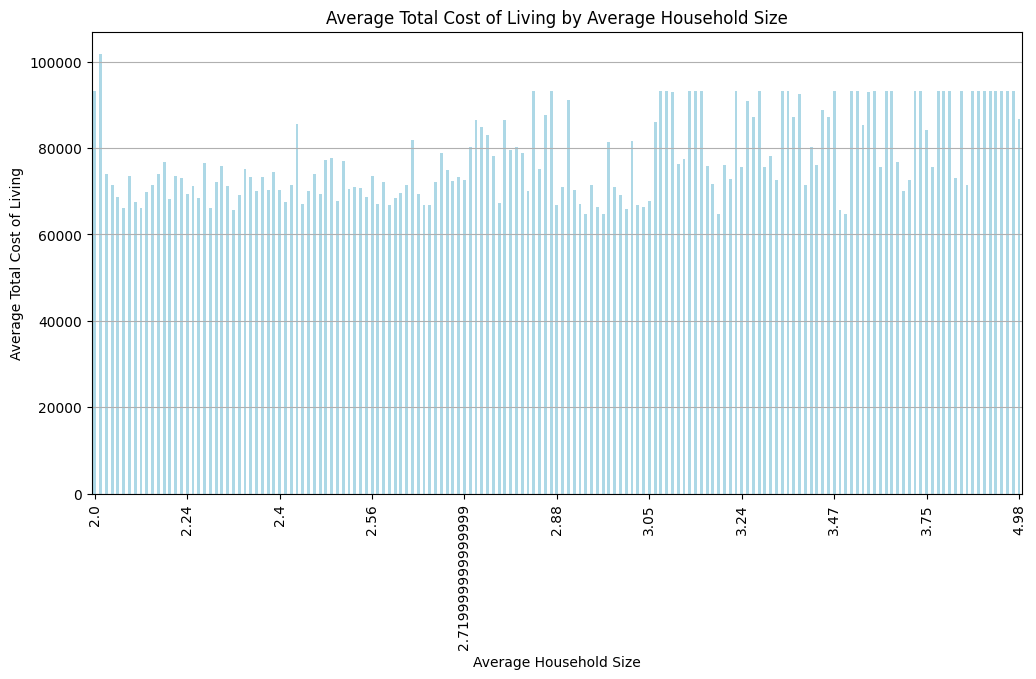

In [34]:
import matplotlib.pyplot as plt

# Calculating the average total cost of living by average household size
average_cost_by_household_size = combined_df.groupby('Average Household Size')['total_cost'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
ax = average_cost_by_household_size.plot(kind='bar', color='lightblue')
plt.title('Average Total Cost of Living by Average Household Size')
plt.xlabel('Average Household Size')
plt.ylabel('Average Total Cost of Living')

# Reducing the number of x-axis labels
labels = [label.get_text() for label in ax.get_xticklabels()]
num_labels = len(labels)
interval = max(1, num_labels // 10)  # Show up to 10 labels

# Setting x-axis labels
ax.set_xticks(ax.get_xticks()[::interval])
ax.set_xticklabels(labels[::interval], rotation=90, fontsize=10)

plt.grid(axis='y')
plt.show()

*Answer to research question: This bar chart shows how the average cost of living correlates with different average household sizes. You can see if households with less or more people tend to live in states with higher or lower costs of living.

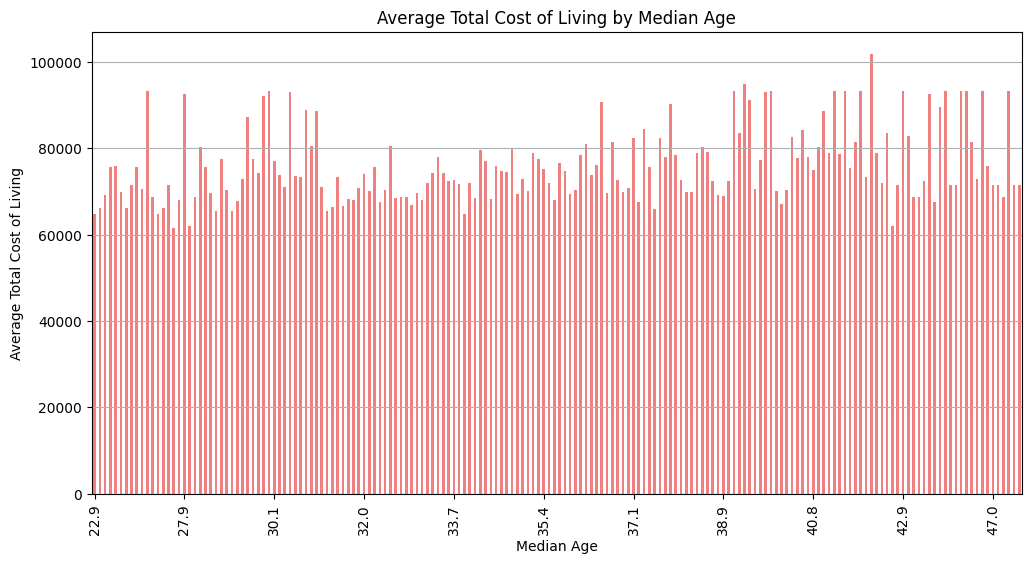

In [33]:
import matplotlib.pyplot as plt

# Calculating the average total cost of living by median age
average_cost_by_age = combined_df.groupby('Median Age')['total_cost'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
ax = average_cost_by_age.plot(kind='bar', color='lightcoral')
plt.title('Average Total Cost of Living by Median Age')
plt.xlabel('Median Age')
plt.ylabel('Average Total Cost of Living')

# Reducing the number of x-axis labels
labels = [label.get_text() for label in ax.get_xticklabels()]
num_labels = len(labels)
interval = max(1, num_labels // 10)  # Show up to 10 labels

# Setting x-axis labels with a subset
ax.set_xticks(ax.get_xticks()[::interval])
ax.set_xticklabels(labels[::interval], rotation=90, fontsize=10)

plt.grid(axis='y')
plt.show()


*Answer to research question: This bar chart shows how the average cost of living relates to the median age. With this, you can see if there is any correlation between states with higher or lower costs of living, and the ages of the people who live there.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer: If I had more time to look further into the data, I would create different types of visualizations to see some more of the realtionships between the demographics of a state and its cost of living. I would be interested to see if there was a correlation between high or low costs of living and race. I would also take more time with the data and extrac citiy values from the area name variable in the cost of living table. That way I can see more pecific insights on city-level metrics.